In [16]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import random
import mpl_toolkits.mplot3d.axes3d as p3
from scipy import interpolate
%matplotlib widget

In [17]:
def rand_generator(Nmin, Nmax, dim, tmax, n_t):
    '''
    This function generates random trajectories for a random number of particles between Nmin and Nmax in a given dimension and a given timeframe.
    
    Parameters
    -----------------------------
    Nmin
        Minimum number of bodies
    Nmax
        Maximum number of bodies
    dim
        Dimension of the Nbody simulation
    tmax
        Maximum time
    n_t
        Number of stime steps
    
    Output
    -----------------------------
    Creates a txt file with random positions of n particle with Nmin < n < Nmax.
    '''
    # generate a random number of particels bewteen 3 and 100
    n = random.randint(Nmin,Nmax)
    # create n random coordinates
    pos_0 = np.random.rand(n,dim)*100
    # define certain timesteps at which the position is 'calculated'
    timestep = np.linspace(0, tmax, n_t)
    # create random trajectories for the particles
    pos = np.ndarray((n_t, n, dim))
    pos[0]=pos_0
    for i in range(n_t-1):
        d_pos = np.random.rand(n,dim)
        pos[i+1] = pos[i] + d_pos

    # a text document with the timestep and x, y, z positions for each particle
    with open('testpos_{}D.txt'.format(dim), 'w') as d:
        for t in range(101):
            d.write(str(timestep[t]) + ' ')
            for i in range(n):
                for j in range(dim):
                    d.write(str(pos[t][i][j])+ ' ')
            d.write('\n')

# Please ignore this block.

The code in this block has been used to generate random trajectories for a random number of particles. To avoid generating new trajectories this has been converted to Markdown mode but can be converted back to code to test for new trajectories.

``
rand_generator(3, 100, 2, 100, 101)
``
``
rand_generator(3, 100, 3, 100, 101)
``



In [18]:
def trajectories(file, dim):
    """
    This function takes a txt file where the lines contains the timesteps and the positions of the N partilces at that timestep and gives the timesteps and a numpy array with the coordinates of each particle at a timestep.
    
    Parameters
    -----------------------------
    file
        The txt file containing the times teps and positions
        The input needs to have the form: t  x_1  y_1  z_1 ... x_N  y_N  z_N
    dim
        Dimension of the Nbody simulation
    
    Output
    -----------------------------
    t
        An array containing the timesteps
    ind_traj
        An array defining the traject of the N particles.
        The output ind_traj has the form [pos_0, ..., pos_t] with pos_i=[[x_0i, y_0i, z_0i], ..., [x_Ni, y_Ni, z_Ni]]
    """
    traj = np.loadtxt('traj/{}.txt'.format(file))
    # get the number of particles and timesteps
    N = int((len(traj[0]) - 1)/dim)
    n_t = len(traj)
    # getting the timesteps
    t=np.zeros(n_t)
    # an arry with the trajectories of the N particles
    ind_traj = np.zeros((n_t, N, dim))
    for i in range(n_t):
        t[i] = traj[i][0]
        part_traj = np.split(traj[i][1:], N)
        for j in range(N):
            ind_traj[i][j]= part_traj[j]
    return t, ind_traj

In [19]:
t, traj = trajectories('testpos_3D', 3)

In [20]:
time = np.arange(0, 102, 2)
f = interpolate.interp1d(t, traj, axis=0)
f_new = f(time)

In [21]:
def animate(file, dim, name='animation', lim= None, dpi=300):
    """
    This function takes a txt file where the lines contains the timesteps and the positions of the N partilces at that timestep and animates the trajectories of the particles.
    
    Parameters
    -----------------------------
    file
        The txt file containing the times teps and positions
        The input needs to have the form: t  x_1  y_1  z_1 ... x_N  y_N  z_N
    dim
        Dimension of the Nbody simulation, has to be 2 or 3
    name
        Name of the animation file
    lim
        An array with the axis limits
    dpi
        DPI of the animation
    
    Output
    -----------------------------
    Creates an mkv file a animating the trajectories of the N particles.
    """
    t, traj = trajectories(file, dim)
    n_t = len(traj)
    N = len(traj[0])
    def update_2(i):
        for j in range(N):
            scatters[j].set_offsets([traj[i][j][0], traj[i][j][1]])
        return scatters

    def update_3(i):
        for j in range(N):
            scatters[j]._offsets3d=(traj[i][j,0:1], traj[i][j,1:2], traj[i][j,2:])
        return scatters

    fig = plt.figure()
    # TODO: add a time slider
    if dim == 2:
        ax = fig.add_subplot(111)
        ax.set_title('N={}'.format(N))
        if lim:
            ax.set_xlim(lim[0][0], lim[0][1])
            ax.set_ylim(lim[1][0], lim[1][1])
        ax.grid(False)
        scatters = [ax.scatter(traj[0][i][0], traj[0][i][1], s=2) for i in range(N)]
        ani = animation.FuncAnimation(fig, update_2, frames=n_t)
        ani.save('ani_traj/{}_2D.mkv'.format(name), fps=30, dpi=dpi)

    if dim == 3:
        ax = fig.add_subplot(projection='3d')
        ax.set_title('N={}'.format(N))
        if lim:
            ax.set_xlim3d(lim[0][0], lim[0][1])
            ax.set_ylim3d(lim[1][0], lim[1][1])
            ax.set_zlim3d(lim[2][0], lim[2][1])
        ax.grid(False)
        scatters = [ax.scatter(traj[0][i][0], traj[0][i][1], traj[0][i][2], s=2) for i in range(N)]
        ani = animation.FuncAnimation(fig, update_3, frames=n_t)
        ani.save('ani_traj/{}_3D.mkv'.format(name), fps=30, dpi=dpi)
    plt.show()

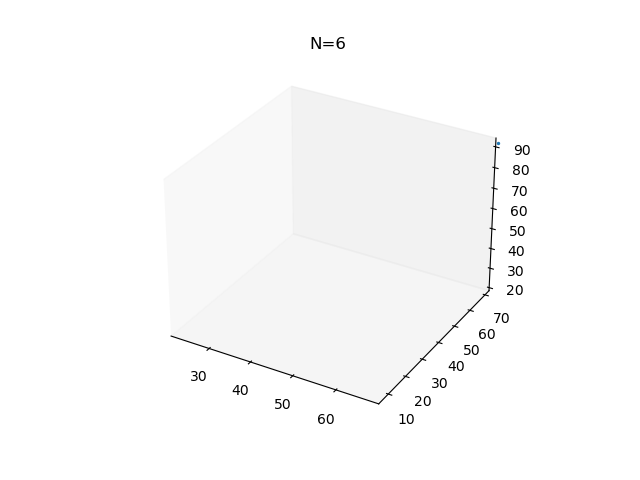

In [22]:
animate('testpos_3D', 3)

In [23]:
def plot(file, dim, name='trajectories', lim =None, dpi=300):
    """
    This function takes a txt file where the lines contains the timesteps and the positions of the N partilces at that timestep and plots the trajectories of the particles in 2D or 3D.
    
    Parameters
    -----------------------------
    file
        The txt file containing the times teps and positions
        The input needs to have the form: t  x_1  y_1  z_1 ... x_N  y_N  z_N
    dim
        Dimension of the Nbody simulation, has to be 2 or 3
    name
        Name of the plot
    lim
        An array with the axis limits
    dpi
        DPI of the image
    
    Output
    -----------------------------
    Creates a png file plotting the trajectories of the N particles.
    """
    t, traj = trajectories(file, dim)
    n_t = len(traj)
    N = len(traj[0])
    fig = plt.figure()
    if dim == 2:
        x = np.zeros((N, n_t))
        y = np.zeros((N, n_t))
        for i in range(N):
            for j in range(n_t):
                x[i][j] = traj[j][i][0]
                y[i][j] = traj[j][i][1]
        ax = fig.add_subplot(111)
        ax.set_title('N={}'.format(N))
        ax.set_xlim(lim[0][0], lim[0][1])
        ax.set_ylim(lim[1][0], lim[1][1])
        ax.grid(False)
        for i in range(N):
            ax.plot(x[i],y[i])
        plt.savefig('{}_2D.png'.format(name), dpi=dpi)

    if dim == 3:
        x = np.zeros((N, n_t))
        y = np.zeros((N, n_t))
        z = np.zeros((N, n_t))
        for i in range(N):
            for j in range(n_t):
                x[i][j] = traj[j][i][0]
                y[i][j] = traj[j][i][1]
                z[i][j] = traj[j][i][2]
        ax = fig.add_subplot(projection='3d')
        ax.set_title('N={}'.format(N))
        ax.set_xlim3d(lim[0][0], lim[0][1])
        ax.set_ylim3d(lim[1][0], lim[1][1])
        ax.set_zlim3d(lim[2][0], lim[2][1])
        for i in range(N):
            ax.plot(x[i],y[i], z[i])
        plt.savefig('{}_3D.png'.format(name), dpi=dpi)